In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Force white background
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Load the CSV with the correct settings
file_path = "C1-1_20250612-002.csv"  # Adjust path if needed
df = pd.read_csv(file_path, sep=';', header=0, skiprows=[0,2], engine='python')
df.columns = df.columns.str.strip()

# Convert relevant columns to numeric
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['F'] = pd.to_numeric(df['F'], errors='coerce')
df['F'] = df['F']*10
df['AVG'] = pd.to_numeric(df['AVG'], errors='coerce')  # Use AVG as average displacement

# Drop rows with NaN values in relevant columns
df = df.dropna(subset=['Time', 'F', 'AVG'])
print(df)


     Index          Date        Time   Counter          F       AVG        L1  \
0        0  45820.481481    0.000000  12754037   -9.20520 -0.004439 -0.003917   
1        1  45820.481493    1.076919  12754040  -12.12511 -0.004603 -0.003917   
2        2  45820.481505    2.076919  12754046   -9.20520 -0.005261 -0.004896   
3        3  45820.481516    3.076919  12754049  -12.12511 -0.005590 -0.006855   
4        4  45820.481528    4.076919  12754055  -13.58506 -0.006083 -0.007018   
5        5  45820.481539    5.076919  12754060  -15.04502 -0.006248 -0.005875   
6        6  45820.481551    6.076919  12754064  -13.58506 -0.006576 -0.005875   
7        7  45820.481562    7.076919  12754069  -12.12511 -0.006576 -0.006528   
8        8  45820.481574    8.076919  12754076  -13.58506 -0.006905 -0.008650   
9        9  45820.481586    9.076919  12754083  -10.66515 -0.007727 -0.009303   
10      10  45820.481597   10.076919  12754087  -12.12511 -0.007892 -0.007834   
11      11  45820.481609   1

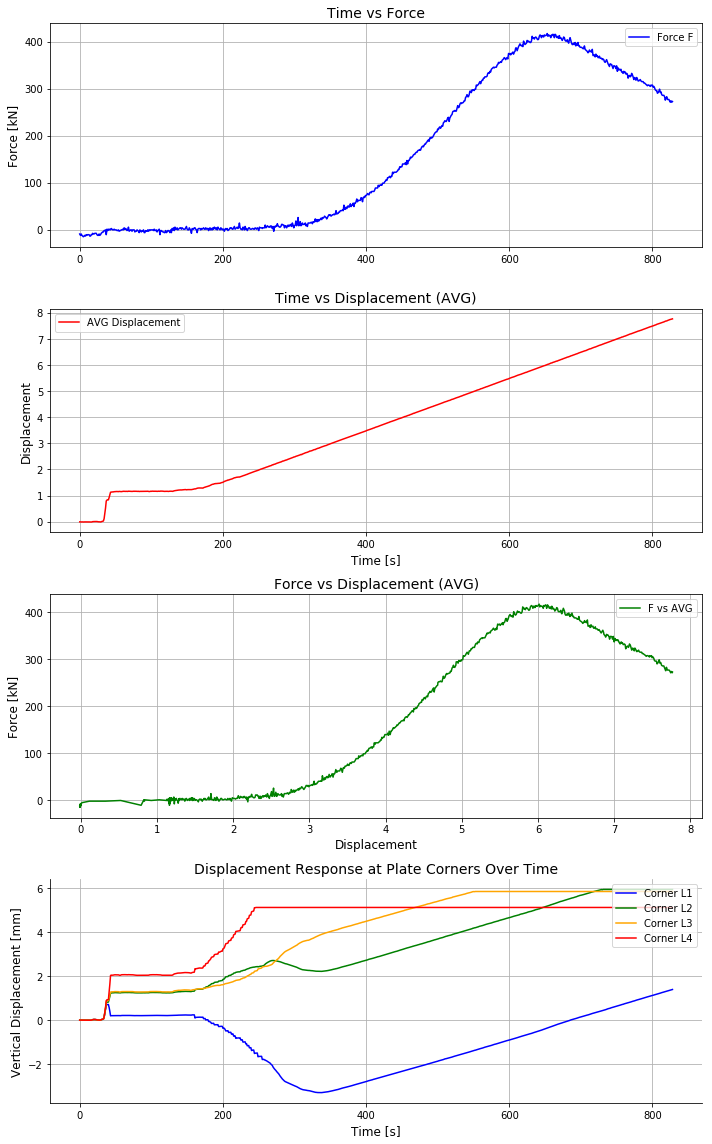

In [117]:


# Create subplots: 4 rows, 1 column
fig, axs = plt.subplots(4, 1, figsize=(10, 16), sharex=False)

# 1. Time vs Force
axs[0].plot(df['Time'], df['F'], color='blue', label='Force F')
axs[0].set_title('Time vs Force', fontsize=14)
axs[0].set_ylabel('Force [kN]', fontsize=12)
axs[0].grid(True)
axs[0].legend()

# 2. Time vs Displacement
axs[1].plot(df['Time'], df['S'], color='red', label='AVG Displacement')
axs[1].set_title('Time vs Displacement (AVG)', fontsize=14)
axs[1].set_xlabel('Time [s]', fontsize=12)
axs[1].set_ylabel('Displacement', fontsize=12)
axs[1].grid(True)
axs[1].legend()

# 3. Force vs Displacement (full)
axs[2].plot(df['S'], df['F'], color='green', label='F vs AVG')
axs[2].set_title('Force vs Displacement (AVG)', fontsize=14)
axs[2].set_xlabel('Displacement', fontsize=12)
axs[2].set_ylabel('Force [kN]', fontsize=12)
axs[2].grid(True)
axs[2].legend()

# 4. Displacement Response at Plate Corners Over Time
axs[3].plot(df['Time'], df['L1'], label='Corner L1', color='blue')
axs[3].plot(df['Time'], df['L2'], label='Corner L2', color='green')
axs[3].plot(df['Time'], df['L3'], label='Corner L3', color='orange')
axs[3].plot(df['Time'], df['L4'], label='Corner L4', color='red')

axs[3].set_title('Displacement Response at Plate Corners Over Time', fontsize=14)
axs[3].set_xlabel('Time [s]', fontsize=12)
axs[3].set_ylabel('Vertical Displacement [mm]', fontsize=12)
axs[3].grid(True)
axs[3].legend(loc='upper right', fontsize=10)

# Clean plot style for thesis
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)


# Layout and show
plt.tight_layout()
plt.show()


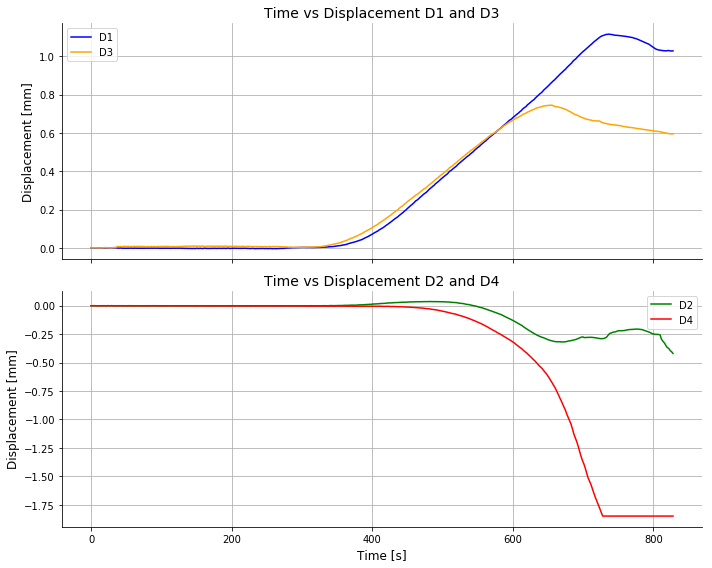

In [118]:
# Create subplots for D1/D3 and D2/D4
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot D1 and D3
axs[0].plot(df['Time'], df['D1'], label='D1', color='blue')
axs[0].plot(df['Time'], df['D3'], label='D3', color='orange')
axs[0].set_title('Time vs Displacement D1 and D3', fontsize=14)
axs[0].set_ylabel('Displacement [mm]', fontsize=12)
axs[0].grid(True)
axs[0].legend()
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Plot D2 and D4
axs[1].plot(df['Time'], df['D2'], label='D2', color='green')
axs[1].plot(df['Time'], df['D4'], label='D4', color='red')
axs[1].set_title('Time vs Displacement D2 and D4', fontsize=14)
axs[1].set_xlabel('Time [s]', fontsize=12)
axs[1].set_ylabel('Displacement [mm]', fontsize=12)
axs[1].grid(True)
axs[1].legend()
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Final layout
plt.tight_layout()
plt.show()


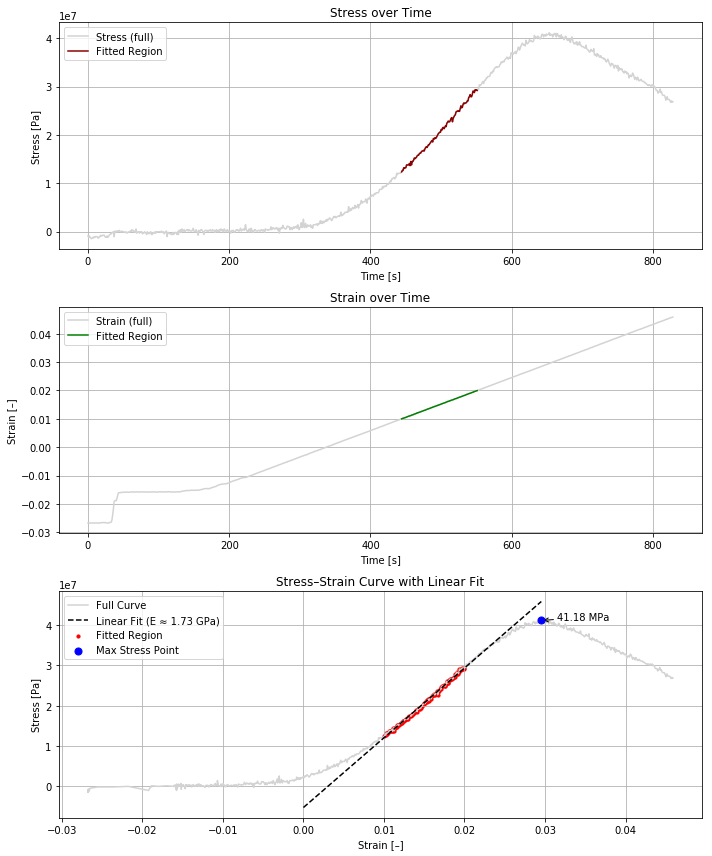

Estimated Young's Modulus: 1.73e+09 Pa
R² of linear fit: 0.9963
Maximum Stress: 41.18 MPa


In [119]:
# --- Geometry input ---
width_mm = 100.66
depth_mm = 100.63
A = (width_mm * depth_mm) / 1e6  # m²
L0 = 107.08 / 1000  # m

# --- Reference undeformed state: L1 minimum ---
i_ref = df['L1'].idxmin()

# Displacement relative to undeformed point
df['S_rel'] = (df['S'] - df.loc[i_ref, 'S']) / 1000  # m
df['F_N'] = df['F'] * 1000  # N
df['strain'] = df['S_rel'] / L0
df['stress'] = df['F_N'] / A

# --- Select linear elastic region for fitting ---
linear_range = df[(df['strain'] >= 0.01) & (df['strain'] <= 0.02)].copy()

# Linear regression for Young's modulus
slope, intercept, r_value, p_value, std_err = linregress(linear_range['strain'], linear_range['stress'])
E = slope

# --- Combined figure with subplots ---
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# Plot 1: Stress over Time
axs[0].plot(df['Time'], df['stress'], color='lightgray', label='Stress (full)')
axs[0].plot(linear_range['Time'], linear_range['stress'], color='darkred', label='Fitted Region')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Stress [Pa]')
axs[0].set_title('Stress over Time')
axs[0].grid(True)
axs[0].legend()

# Plot 2: Strain over Time
axs[1].plot(df['Time'], df['strain'], color='lightgray', label='Strain (full)')
axs[1].plot(linear_range['Time'], linear_range['strain'], color='green', label='Fitted Region')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Strain [–]')
axs[1].set_title('Strain over Time')
axs[1].grid(True)
axs[1].legend()

# Plot 3: Stress–Strain with linear fit and max point
strain_max = df.loc[df['stress'].idxmax(), 'strain']
stress_max = df['stress'].max()
strain_fit_line = np.linspace(0, strain_max, 200)
stress_fit_line = intercept + slope * strain_fit_line

axs[2].plot(df['strain'], df['stress'], label='Full Curve', color='lightgray')
axs[2].plot(strain_fit_line, stress_fit_line, color='black', linestyle='--',
            label='Linear Fit (E ≈ {:.2f} GPa)'.format(E / 1e9))
axs[2].scatter(linear_range['strain'], linear_range['stress'], color='red', s=10, label='Fitted Region')
axs[2].scatter(strain_max, stress_max, color='blue', s=50, zorder=5, label='Max Stress Point')
axs[2].annotate(f'{stress_max/1e6:.2f} MPa', xy=(strain_max, stress_max),
                xytext=(strain_max + 0.002, stress_max),
                arrowprops=dict(arrowstyle='->'), fontsize=10)

axs[2].set_xlabel('Strain [–]')
axs[2].set_ylabel('Stress [Pa]')
axs[2].set_title('Stress–Strain Curve with Linear Fit')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.savefig('stress_strain_analysis_2.png', dpi=300)
plt.show()


# --- Output values ---
print("Estimated Young's Modulus: {:.2e} Pa".format(E))
print("R² of linear fit: {:.4f}".format(r_value**2))
print("Maximum Stress: {:.2f} MPa".format(stress_max / 1e6))

In [110]:
ain'], linear_range['stress'], label='Fitted Region', color='blue')
plt.plot(strain_fit_line, stress_fit_line, '--', label='Extended Linear Fit', color='red')
plt.xlabel('Strain [–]')
plt.ylabel('Stress [Pa]')
plt.xlim(0,0.04)
plt.title("Young's Modulus Estimation with Extended Fit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-110-22d9ffa8eb10>, line 1)

# TEST 1

In [111]:

# Load the CSV with the correct settings
file_path = "C1-1_20250612-001.csv"  # Adjust path if needed
df = pd.read_csv(file_path, sep=';', header=0, skiprows=[0,2], engine='python')
df.columns = df.columns.str.strip()

# Convert relevant columns to numeric
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['F'] = pd.to_numeric(df['F'], errors='coerce')
df['F'] = df['F']
df['AVG'] = pd.to_numeric(df['AVG'], errors='coerce')  # Use AVG as average displacement

# Drop rows with NaN values in relevant columns
df = df.dropna(subset=['Time', 'F', 'AVG'])
print(df)


     Index          Date        Time   Counter           F       AVG  \
0        0  45820.446331    0.000000  12734357   -0.482534  0.000000   
1        1  45820.446343    1.023622  12734374   -0.482534  0.000000   
2        2  45820.446354    2.023622  12734386   -0.336538  0.000000   
3        3  45820.446366    3.023622  12734401   -0.482534  0.000000   
4        4  45820.446377    4.023622  12734416   -0.336538  0.000000   
5        5  45820.446389    5.023622  12734432   -0.336538  0.000000   
6        6  45820.446400    6.023622  12734446   -0.482534  0.000000   
7        7  45820.446412    7.023622  12734460   -0.044548  0.000000   
8        8  45820.446424    8.023622  12734475   -0.482534  0.000000   
9        9  45820.446435    9.023622  12734495   -0.044548  0.000000   
10      10  45820.446447   10.023622  12734511   -0.336538  0.000000   
11      11  45820.446458   11.023622  12734521   -0.482534  0.000000   
12      12  45820.446470   12.023622  12734532   -0.336538  0.00

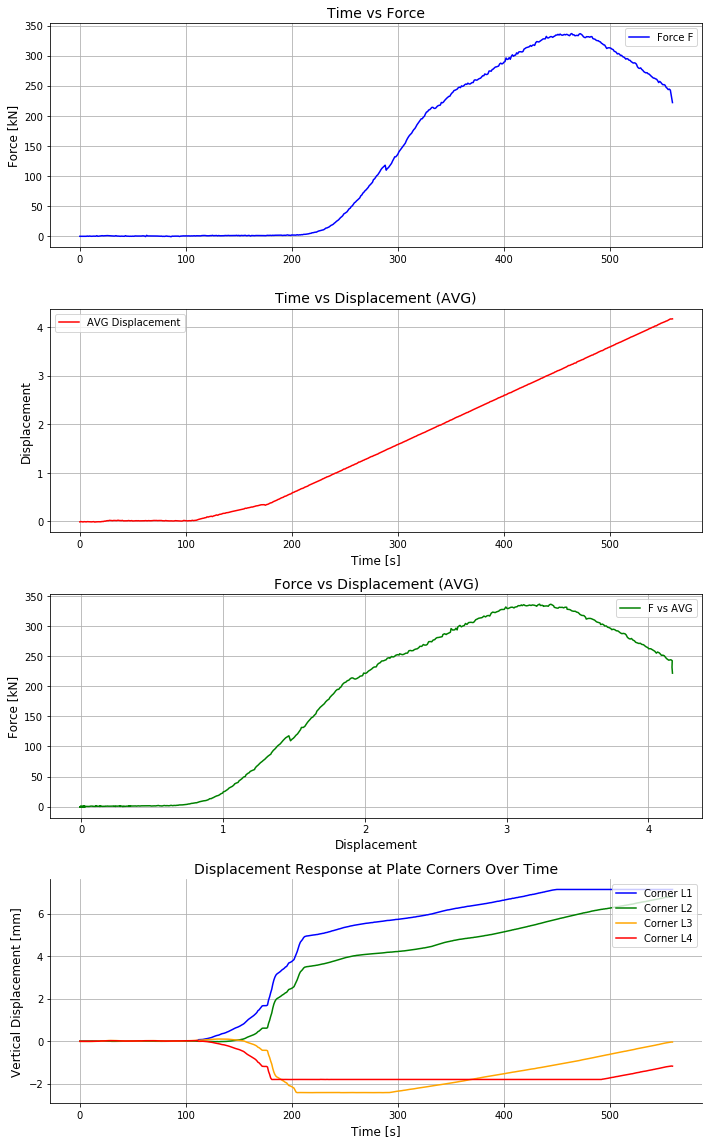

In [112]:


# Create subplots: 4 rows, 1 column
fig, axs = plt.subplots(4, 1, figsize=(10, 16), sharex=False)

# 1. Time vs Force
axs[0].plot(df['Time'], df['F'], color='blue', label='Force F')
axs[0].set_title('Time vs Force', fontsize=14)
axs[0].set_ylabel('Force [kN]', fontsize=12)
axs[0].grid(True)
axs[0].legend()

# 2. Time vs Displacement
axs[1].plot(df['Time'], df['S'], color='red', label='AVG Displacement')
axs[1].set_title('Time vs Displacement (AVG)', fontsize=14)
axs[1].set_xlabel('Time [s]', fontsize=12)
axs[1].set_ylabel('Displacement', fontsize=12)
axs[1].grid(True)
axs[1].legend()

# 3. Force vs Displacement (full)
axs[2].plot(df['S'], df['F'], color='green', label='F vs AVG')
axs[2].set_title('Force vs Displacement (AVG)', fontsize=14)
axs[2].set_xlabel('Displacement', fontsize=12)
axs[2].set_ylabel('Force [kN]', fontsize=12)
axs[2].grid(True)
axs[2].legend()

# 4. Displacement Response at Plate Corners Over Time
axs[3].plot(df['Time'], df['L1'], label='Corner L1', color='blue')
axs[3].plot(df['Time'], df['L2'], label='Corner L2', color='green')
axs[3].plot(df['Time'], df['L3'], label='Corner L3', color='orange')
axs[3].plot(df['Time'], df['L4'], label='Corner L4', color='red')

axs[3].set_title('Displacement Response at Plate Corners Over Time', fontsize=14)
axs[3].set_xlabel('Time [s]', fontsize=12)
axs[3].set_ylabel('Vertical Displacement [mm]', fontsize=12)
axs[3].grid(True)
axs[3].legend(loc='upper right', fontsize=10)

# Clean plot style for thesis
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)


# Layout and show
plt.tight_layout()
plt.show()


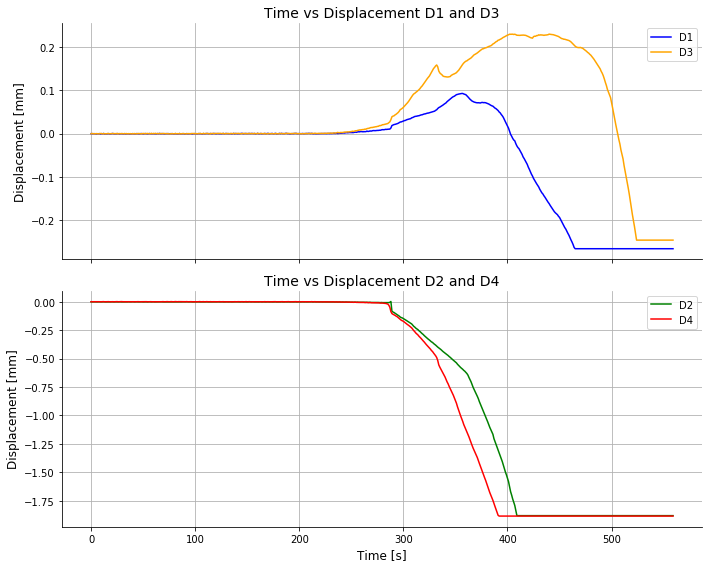

In [113]:
# Create subplots for D1/D3 and D2/D4
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot D1 and D3
axs[0].plot(df['Time'], df['D1'], label='D1', color='blue')
axs[0].plot(df['Time'], df['D3'], label='D3', color='orange')
axs[0].set_title('Time vs Displacement D1 and D3', fontsize=14)
axs[0].set_ylabel('Displacement [mm]', fontsize=12)
axs[0].grid(True)
axs[0].legend()
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Plot D2 and D4
axs[1].plot(df['Time'], df['D2'], label='D2', color='green')
axs[1].plot(df['Time'], df['D4'], label='D4', color='red')
axs[1].set_title('Time vs Displacement D2 and D4', fontsize=14)
axs[1].set_xlabel('Time [s]', fontsize=12)
axs[1].set_ylabel('Displacement [mm]', fontsize=12)
axs[1].grid(True)
axs[1].legend()
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Final layout
plt.tight_layout()
plt.show()


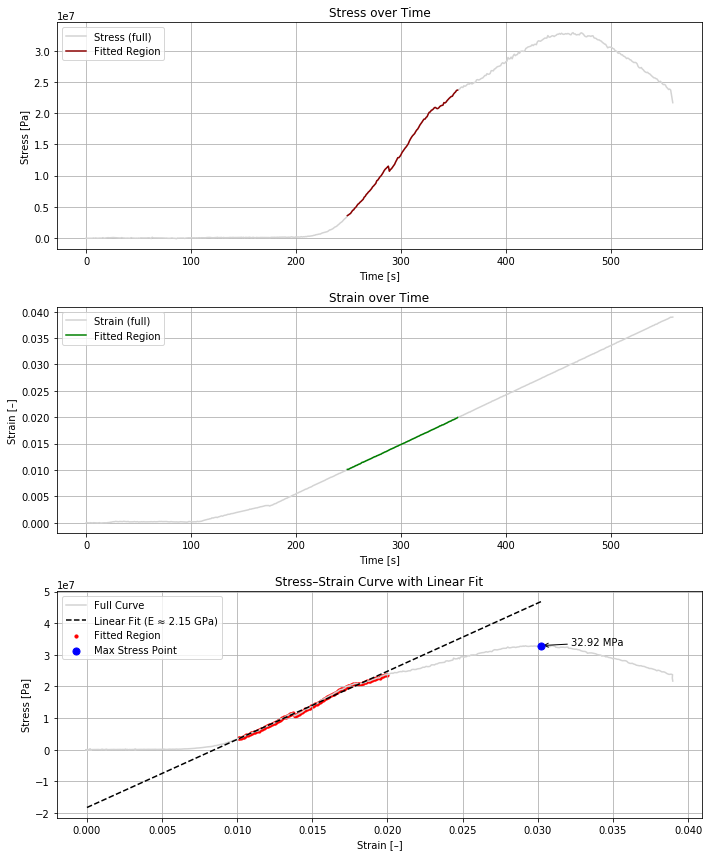

Estimated Young's Modulus: 2.15e+09 Pa
R² of linear fit: 0.9936
Maximum Stress: 32.92 MPa


In [114]:
# --- Geometry input ---
width_mm = 101.60
depth_mm = 100.63
A = (width_mm * depth_mm) / 1e6  # m²
L0 = 107.08 / 1000  # m


# --- Reference undeformed state: L1 minimum ---
i_ref = df['L1'].idxmin()

# Displacement relative to undeformed point
df['S_rel'] = (df['S'] - df.loc[i_ref, 'S']) / 1000  # m
df['F_N'] = df['F'] * 1000  # N
df['strain'] = df['S_rel'] / L0
df['stress'] = df['F_N'] / A

# --- Select linear elastic region for fitting ---
linear_range = df[(df['strain'] >= 0.01) & (df['strain'] <= 0.02)].copy()

# Linear regression for Young's modulus
slope, intercept, r_value, p_value, std_err = linregress(linear_range['strain'], linear_range['stress'])
E = slope

# --- Combined figure with subplots ---
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# Plot 1: Stress over Time
axs[0].plot(df['Time'], df['stress'], color='lightgray', label='Stress (full)')
axs[0].plot(linear_range['Time'], linear_range['stress'], color='darkred', label='Fitted Region')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Stress [Pa]')
axs[0].set_title('Stress over Time')
axs[0].grid(True)
axs[0].legend()

# Plot 2: Strain over Time
axs[1].plot(df['Time'], df['strain'], color='lightgray', label='Strain (full)')
axs[1].plot(linear_range['Time'], linear_range['strain'], color='green', label='Fitted Region')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Strain [–]')
axs[1].set_title('Strain over Time')
axs[1].grid(True)
axs[1].legend()

# Plot 3: Stress–Strain with linear fit and max point
strain_max = df.loc[df['stress'].idxmax(), 'strain']
stress_max = df['stress'].max()
strain_fit_line = np.linspace(0, strain_max, 200)
stress_fit_line = intercept + slope * strain_fit_line

axs[2].plot(df['strain'], df['stress'], label='Full Curve', color='lightgray')
axs[2].plot(strain_fit_line, stress_fit_line, color='black', linestyle='--',
            label='Linear Fit (E ≈ {:.2f} GPa)'.format(E / 1e9))
axs[2].scatter(linear_range['strain'], linear_range['stress'], color='red', s=10, label='Fitted Region')
axs[2].scatter(strain_max, stress_max, color='blue', s=50, zorder=5, label='Max Stress Point')
axs[2].annotate(f'{stress_max/1e6:.2f} MPa', xy=(strain_max, stress_max),
                xytext=(strain_max + 0.002, stress_max),
                arrowprops=dict(arrowstyle='->'), fontsize=10)

axs[2].set_xlabel('Strain [–]')
axs[2].set_ylabel('Stress [Pa]')
axs[2].set_title('Stress–Strain Curve with Linear Fit')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.savefig('stress_strain_analysis_1.png', dpi=300)
plt.show()


# --- Output values ---
print("Estimated Young's Modulus: {:.2e} Pa".format(E))
print("R² of linear fit: {:.4f}".format(r_value**2))
print("Maximum Stress: {:.2f} MPa".format(stress_max / 1e6))


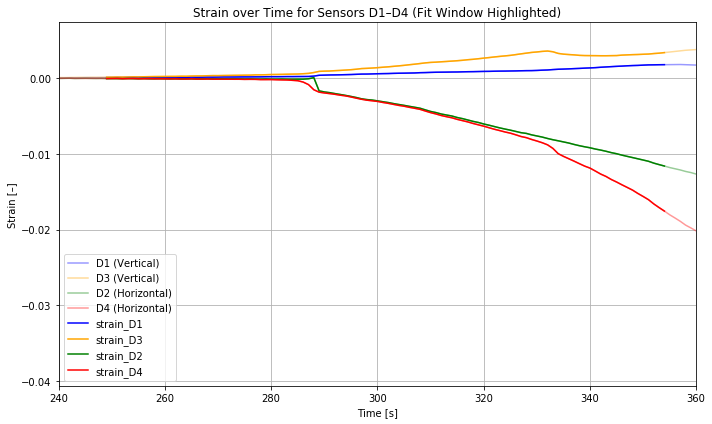

In [115]:
# Initial gauge lengths in mm
L0_D1 = 52.17
L0_D3 = 44.63
L0_D2 = 48.96
L0_D4 = 55.64

# Strain calculations assuming D(0) = 0
df['strain_D1'] = df['D1'] / L0_D1
df['strain_D3'] = df['D3'] / L0_D3
df['strain_D2'] = df['D2'] / L0_D2
df['strain_D4'] = df['D4'] / L0_D4

# Add strain values to linear_range (by index)
strain_cols = ['strain_D1', 'strain_D2', 'strain_D3', 'strain_D4']
linear_range[strain_cols] = df.loc[linear_range.index, strain_cols]

# Then plot as before
plt.figure(figsize=(10, 6))

# Faded full curves
plt.plot(df['Time'], df['strain_D1'], label='D1 (Vertical)', color='blue', alpha=0.4)
plt.plot(df['Time'], df['strain_D3'], label='D3 (Vertical)', color='orange', alpha=0.4)
plt.plot(df['Time'], df['strain_D2'], label='D2 (Horizontal)', color='green', alpha=0.4)
plt.plot(df['Time'], df['strain_D4'], label='D4 (Horizontal)', color='red', alpha=0.4)

# Highlight fit window
plt.plot(linear_range['Time'], linear_range['strain_D1'], color='blue')
plt.plot(linear_range['Time'], linear_range['strain_D3'], color='orange')
plt.plot(linear_range['Time'], linear_range['strain_D2'], color='green')
plt.plot(linear_range['Time'], linear_range['strain_D4'], color='red')

plt.xlabel('Time [s]')
plt.ylabel('Strain [–]')
plt.xlim(240,360)
plt.title('Strain over Time for Sensors D1–D4 (Fit Window Highlighted)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
